<a href="https://colab.research.google.com/github/Divya1123/Wine_Classification_ML/blob/main/wine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv('wine.data')

# **Exploratory Data Analysis**

In [54]:
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [55]:
# adding columns to our dataset
data.columns = ['Target Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [56]:
data.head(20)

,Target Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Target Class                  177 non-null    int64  
 1   Alcohol                       177 non-null    float64
 2   Malic acid                    177 non-null    float64
 3   Ash                           177 non-null    float64
 4   Alcalinity of ash             177 non-null    float64
 5   Magnesium                     177 non-null    int64  
 6   Total phenols                 177 non-null    float64
 7   Flavanoids                    177 non-null    float64
 8   Nonflavanoid phenols          177 non-null    float64
 9   Proanthocyanins               177 non-null    float64
 10  Color intensity               177 non-null    float64
 11  Hue                           177 non-null    float64
 12  OD280/OD315 of diluted wines  177 non-null    float64
 13  Proli

In [58]:
data.describe()

,Target Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Finding correlation**

In [59]:
data.corr()['Target Class'].sort_values(ascending= False)

Target Class                    1.000000
Alcalinity of ash               0.513963
Nonflavanoid phenols            0.487215
Malic acid                      0.436127
Color intensity                 0.268562
Ash                            -0.048260
Magnesium                      -0.198944
Alcohol                        -0.321238
Proanthocyanins                -0.494887
Hue                            -0.617690
Proline                        -0.631227
Total phenols                  -0.717933
OD280/OD315 of diluted wines   -0.786428
Flavanoids                     -0.846485
Name: Target Class, dtype: float64

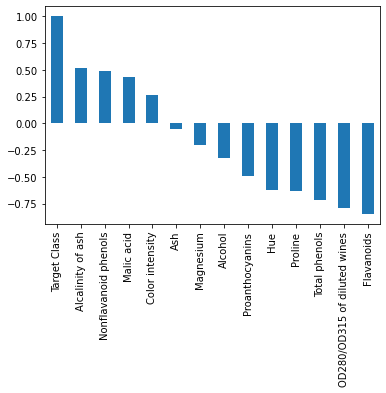

In [60]:
data.corr()['Target Class'].sort_values(ascending= False).plot(kind= 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


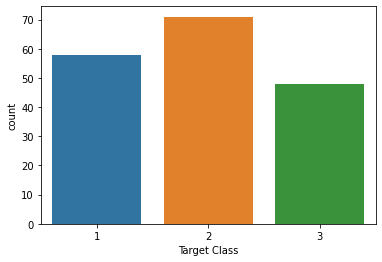

In [61]:
sns.countplot(data['Target Class'])

We can observe from above graph that dataset is somewhat balanced.

**Check missing Data**

In [62]:
# check missing data in column
data.isna().sum()

Target Class                    0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

we do not have any missing value in our dataset.

# **Train Test Split**

In [63]:
X = data.drop('Target Class', axis =1)
Y = data['Target Class']

In [64]:
X.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.30, shuffle = True, random_state=0)

**Standardize the data**

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Model Building**

**1) KNN**

In [69]:
from sklearn.neighbors import KNeighborsClassifier

**Choosing K using Elbow Method**

In [70]:
error_rate = []

for i in range(1,41):
  KNN_model = KNeighborsClassifier(n_neighbors= i)
  KNN_model.fit(x_train, y_train)
  pred_i = KNN_model.predict(x_test)
  # calculate average error where pred do not match y_test value
  error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'K vs error rate')

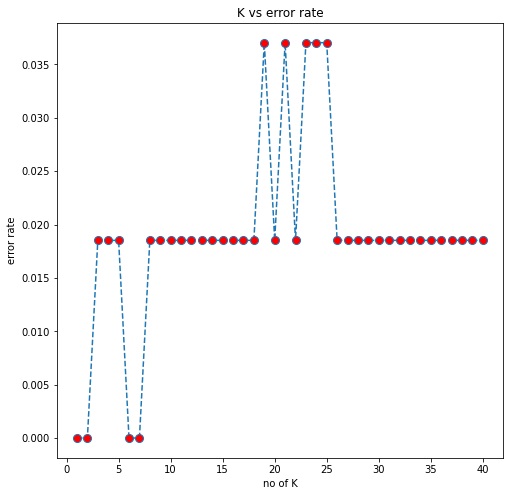

In [71]:
plt.figure(figsize= (8,8))
plt.plot(range(1,41), error_rate, marker= 'o', markerfacecolor= 'red', markersize=8, linestyle= '--')
plt.xlabel('no of K')
plt.ylabel('error rate')
plt.title('K vs error rate')

From above elbow graph, we can observe that graph is not good and so KNN is not a good model for this dataset. We will try other classification model on this dataset.

**2)SVM**

In [72]:
from sklearn.svm import SVC

In [73]:
SVM_model = SVC()

In [74]:
SVM_model.fit(x_train,y_train)

SVC()

In [75]:
prediction = SVM_model.predict(x_test)

**SVM model evaluation**

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
print(confusion_matrix(y_test, prediction))

[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]


In [78]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



**Grid Search** We can see from our confusion matrix and report that model is not good. This is because in SVM we need to set some parameter. We will do this using Grid Search. It will find good parameters.

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
grid_para = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [81]:
grid_model = GridSearchCV(SVC(), grid_para, verbose=3)

In [82]:
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.400 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.400 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.400 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.417 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.417 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.920 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.960 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.917 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=1.000 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.440 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [83]:
# we can get param details used by model
grid_model.best_params_

{'C': 10, 'gamma': 0.01}

In [84]:
grid_model.best_estimator_

SVC(C=10, gamma=0.01)

**Prediction and model evaluation**

In [85]:
grid_prediction = grid_model.predict(x_test)

In [86]:
print(confusion_matrix(y_test, grid_prediction))

[[19  0  0]
 [ 0 21  0]
 [ 0  1 13]]


In [87]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



**3) Decision Tree**

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
decision_model = DecisionTreeClassifier()

In [90]:
decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [91]:
DT_prediction = decision_model.predict(x_test)

**Decision Tree model evaluation**

In [92]:
print(confusion_matrix(y_test,DT_prediction))

[[19  0  0]
 [ 1 17  3]
 [ 0  0 14]]


In [93]:
print(classification_report(y_test,DT_prediction))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.81      0.89        21
           3       0.82      1.00      0.90        14

    accuracy                           0.93        54
   macro avg       0.92      0.94      0.92        54
weighted avg       0.94      0.93      0.92        54



**Decision Tree Visualization**

In [94]:
from sklearn import tree

In [95]:
feature_names = list(data.columns[1:])
class_names = ['1','2','3']

[Text(0.3333333333333333, 0.875, 'Color intensity <= -0.666\ngini = 0.658\nsamples = 123\nvalue = [39, 50, 34]\nclass = 2'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = 2'),
 Text(0.5, 0.625, 'Flavanoids <= -0.413\ngini = 0.59\nsamples = 82\nvalue = [39, 9, 34]\nclass = 1'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = 3'),
 Text(0.6666666666666666, 0.375, 'Proline <= -0.221\ngini = 0.305\nsamples = 48\nvalue = [39, 9, 0]\nclass = 1'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]\nclass = 2'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = 1')]

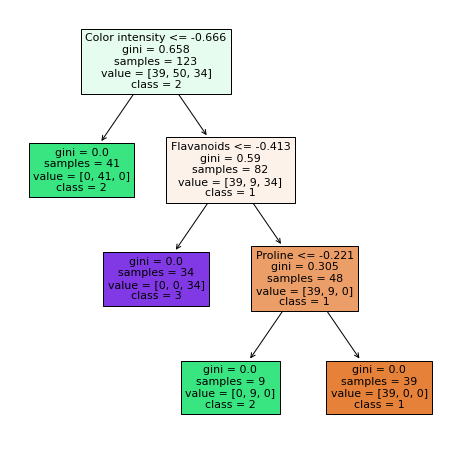

In [96]:
plt.figure(figsize=(8,8))
tree.plot_tree(decision_model, feature_names = feature_names, class_names = class_names, filled= True)

**4) Random Forest**

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
random_forest_model = RandomForestClassifier(n_estimators = 100)

In [99]:
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
RF_prediction = random_forest_model.predict(x_test)

In [101]:
print(confusion_matrix(y_test,RF_prediction))

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [102]:
print(classification_report(y_test,RF_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

